In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


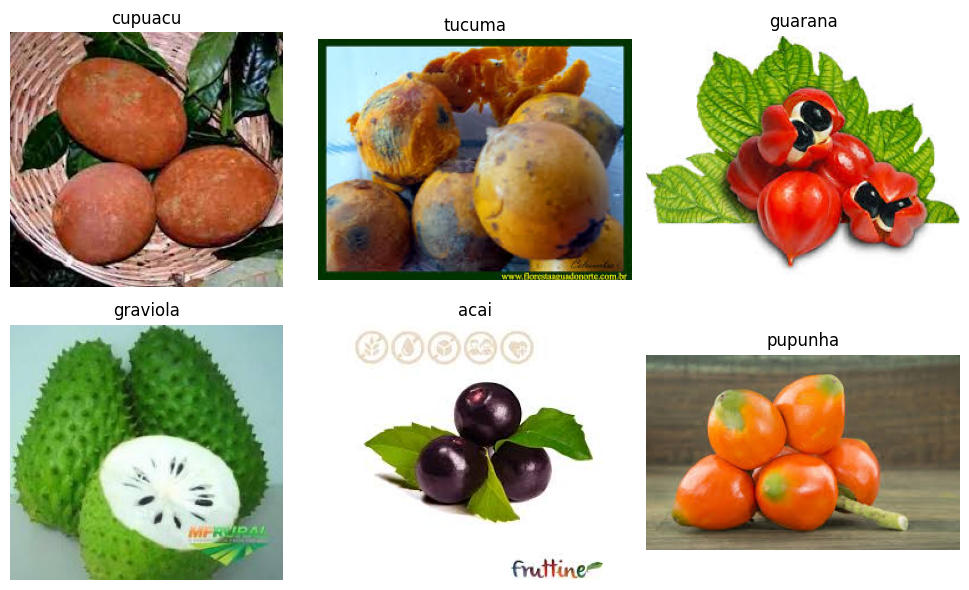

In [18]:
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib.image import imread

#directory containing training images
train_directory = '/content/drive/MyDrive/FruitinAmazon/train'

#retrieve the list of class directories
class_folders = [folder for folder in os.listdir(train_directory) if os.path.isdir(os.path.join(train_directory, folder))]

#selecting one random image from each class
chosen_images =[]
for folder in class_folders:
  folder_path = os.path.join(train_directory, folder)
  image_files = [img for img in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, img))]
  if image_files:
    selected_image = random.choice(image_files)
    chosen_images.append((folder, os.path.join(folder_path, selected_image)))

#display selected image in a grid format with two rows
num_classes = len(chosen_images)
fig , axes = plt.subplots(2, (num_classes + 1 ) // 2, figsize = (10, 6))
axes = axes.flatten()

for ax, (class_name, image_path) in zip(axes, chosen_images):
  image = imread(image_path)
  ax.imshow(image)
  ax.set_title(class_name)
  ax.axis('off')
#hide any ramaining empty sublots
for ax in axes[len(chosen_images):]:
  ax.axis('off')
plt.tight_layout()
plt.show()


• What did you Observe?

Ans) I noticed that the code picks one random image from each folder and display in grid. It first finds all the folders, selects a randeo image from each and then arranges them in two rows using Matplotlib. Each image is labeled with its class name.

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

#Define dataset paths
train_directory = '/content/drive/MyDrive/FruitinAmazon/train'
test_directory = '/content/drive/MyDrive/FruitinAmazon/test'

#load database
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical',
    shuffle=True,
)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    image_size=(128, 128),
    batch_size=16,
    label_mode='categorical',
    shuffle=False,
)

#Storing the number of class before mapping
num_classes = len(train_dataset.class_names)

#normalize image
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255.0, label

train_dataset = train_dataset.map(normalize_img)
test_dataset = test_dataset.map(normalize_img)

#Define CNN model
model = keras.Sequential([
    keras.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation="relu"),  # Conv1
    layers.MaxPooling2D((2, 2), strides=2),                            # Pool1
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation="relu"),  # Conv2
    layers.MaxPooling2D((2, 2), strides=2),                            # Pool2
    layers.Flatten(),                                                  # Flatten
    layers.Dense(64, activation="relu"),                               # Hidden 1
    layers.Dense(128, activation="relu"),                              # Hidden 2
    layers.Dense(num_classes, activation="softmax")
])

model.summary()

#Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    verbose=1,
    mode='max'
)

#Train model
history = model.fit(
    train_dataset,
    epochs=250,
    validation_data=test_dataset,
    callbacks=[checkpoint, early_stopping]
)

#Evaluate model
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc: .4f}')

#make prediction in one batch
for images, labels in test_dataset.take(1):
  predictions = model.predict(images)
  predicted_labels = np.argmax(predictions, axis=1)
  true_labels = np.argmax(labels, axis=1)
  print("Predicted Labels:", predicted_labels[:5])
  print("Actual labels: ", true_labels[:5])
  break




Found 90 files belonging to 6 classes.
Found 30 files belonging to 6 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.2051 - loss: 1.8741
Epoch 1: val_accuracy improved from -inf to 0.13333, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 645ms/step - accuracy: 0.1983 - loss: 1.8864 - val_accuracy: 0.1333 - val_loss: 1.9727
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.2579 - loss: 1.8147
Epoch 2: val_accuracy improved from 0.13333 to 0.16667, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 606ms/step - accuracy: 0.2462 - loss: 1.8293 - val_accuracy: 0.1667 - val_loss: 1.7496
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.2495 - loss: 1.6990
Epoch 3: val_accuracy improved from 0.16667 to 0.20000, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 501ms/step - accuracy: 0.2649 - loss: 1.7015 - val_accuracy: 0.2000 - val_loss: 1.7264
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.3870 - loss: 1.6487
Epoch 4: val_accuracy improved from 0.20000 to 0.30

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted Labels: [0 0 0 0 0]
Actual labels:  [0 0 0 0 0]


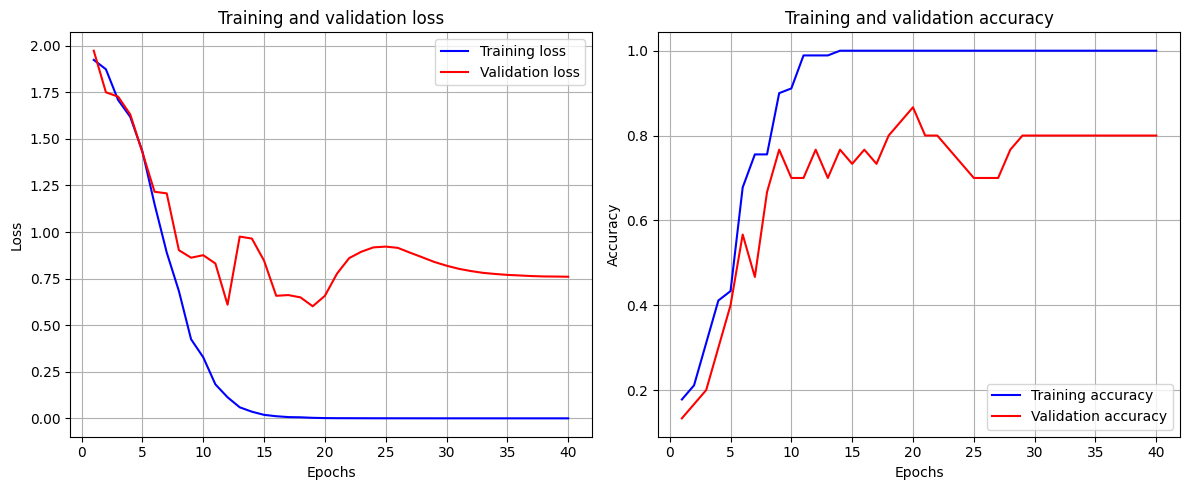

In [20]:
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

#Create subplots : 1 row, 2 columns
plt.figure(figsize=(12, 5))

#Plot 1 : loss
plt.subplot(1,2,1)
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

#plot 2 : Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

#Adjust layout and display
plt.tight_layout()
plt.show()

In [21]:
model.save("fruitdetection.h5")
loaded_model = keras.models.load_model("fruitdetection.h5")

print('model saved to fruitdetection.h5')
print('model loaded from fruitdetection.h5')

model saved to fruitdetection.h5
model loaded from fruitdetection.h5


In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report
loaded_model = keras.models.load_model('fruitdetection.h5')
print("Model loaded for predictions")


# Collect all test images and labels
all_images = []
all_labels = []
for images, labels in test_dataset:
    all_images.append(images.numpy())
    all_labels.append(labels.numpy())

# Concatenate batches into single arrays
test_images = np.concatenate(all_images, axis=0)  # Shape: (30, 128, 128, 3)
test_labels_onehot = np.concatenate(all_labels, axis=0)  # Shape: (30, 6)

# Make predictions
predictions = loaded_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_labels = np.argmax(test_labels_onehot, axis=1)  # Convert one-hot to class indices

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    image_size=(128, 128),
    batch_size=16,
    label_mode='categorical',
    shuffle=False,
)
# Get class names from the dataset
class_names = test_dataset.class_names
print(f"Class names: {class_names}")

#Normalize images function
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255.0, label

test_dataset = test_dataset.map(normalize_img)

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", report)

Model loaded for predictions
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Found 30 files belonging to 6 classes.
Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']
Classification Report:
               precision    recall  f1-score   support

        acai       0.71      1.00      0.83         5
     cupuacu       0.75      0.60      0.67         5
    graviola       0.71      1.00      0.83         5
     guarana       0.83      1.00      0.91         5
     pupunha       1.00      0.60      0.75         5
      tucuma       1.00      0.60      0.75         5

    accuracy                           0.80        30
   macro avg       0.84      0.80      0.79        30
weighted avg       0.84      0.80      0.79        30

